# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ベルヌーイ分布" data-toc-modified-id="ベルヌーイ分布-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ベルヌーイ分布</a></div><div class="lev2 toc-item"><a href="#乱数の生成" data-toc-modified-id="乱数の生成-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>乱数の生成</a></div><div class="lev2 toc-item"><a href="#複数サンプルから成るデータの出現確率" data-toc-modified-id="複数サンプルから成るデータの出現確率-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>複数サンプルから成るデータの出現確率</a></div><div class="lev2 toc-item"><a href="#データに基づくパラメータの推定：最尤推定" data-toc-modified-id="データに基づくパラメータの推定：最尤推定-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>データに基づくパラメータの推定：最尤推定</a></div><div class="lev2 toc-item"><a href="#サンプル数による最尤推定量のばらつき" data-toc-modified-id="サンプル数による最尤推定量のばらつき-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>サンプル数による最尤推定量のばらつき</a></div><div class="lev2 toc-item"><a href="#勾配法による最尤推定" data-toc-modified-id="勾配法による最尤推定-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>勾配法による最尤推定</a></div>

In [1]:
# 図をインラインで表示するように指定します. 
%matplotlib inline 

import numpy as np # Numpyモジュールをインポートします. as以降でnpという別名を与えます.
import matplotlib.pyplot as plt # Matplotlibモジュールをインポートします. pltという別名を与えます. 
import seaborn as sns # 図を綺麗に表示するモジュールです. このモジュールは省略できます. 

# ベルヌーイ分布
* 実現値として0か1を取る離散型確率分布です. 
* 確率分布関数は次式で表されます（$x\in\{0,1\}$）:

\begin{eqnarray}
P(x) = \theta^{x}\cdot(1-\theta)^{1-x}
\end{eqnarray}

* $\theta\in [0, 1]$は$x=1$となる確率です. 実際, $P(x=1)=\theta$となることが式から分かります. 
* $\theta$はベルヌーイ分布のパラメータと呼ばれます. 
* 確率分布なので$\sum_{x\in\{0,1\}}P(x)=1$となります. 

\begin{eqnarray}
P(0)+P(1) &=& \theta^{0}\cdot(1-\theta)^{1}+\theta^{1}\cdot(1-\theta)^{0}\\
          &=& (1-\theta)+\theta = 1
\end{eqnarray}

## 乱数の生成

In [3]:
rng = np.random.RandomState(0) # シード0を与えて乱数生成器を生成します. シードの値はなんでも良いです. 
x = rng.binomial(n=1, p=0.5, size=10) # ベルヌーイ分布はサンプル数n=1としたときの二項分布と等価です. 
print(x)

[1 1 1 1 0 1 0 1 1 0]


## 複数サンプルから成るデータの出現確率
* サンプルが独立同分布から出現すると仮定すると, その出現確率は各サンプルの出現確率の積になります. 例えばサンプル数が3の場合($x_{1}, x_{2}, x_{3}$と名前を付けます), その出現確率は次式で表されます. 

\begin{eqnarray}
P(x_{1},x_{2},x_{3}) &=& P(x_{1})\cdot P(x_{2})\cdot P(x_{3})
\end{eqnarray}

* サンプルが独立同分布から生成されたとすれば, $P(x)$がベルヌーイ分布でなくても上の式は成り立ちます. 
* 記号の簡略化のため, 次のように書きます.

\begin{eqnarray}
P(D) &=& \prod_{n=1}^{N}P(x_{n})\\
D &=& \{x_{n}\}_{n=1}^{N}
\end{eqnarray}

* $D$は$N$個のサンプルから成るデータを表します. 
* $P(x_{n})$が小さくて$N$が大きい場合, 例えば$P(x_{n})=0.01$で$N=1000$の場合, $P(D)$は10の-2000乗という非常に小さな値になるため, 計算機で取り扱うのが大変です. $P(D)$の対数を取ると, 積が和になるのでそのような不都合が解消されます. 

\begin{eqnarray}
\log P(D) &=& \sum_{n=1}^{N}\log P(x_{n})=\sum_{n=1}^{N}\left[x\log\theta + (1-x)\log(1-\theta)\right]
\end{eqnarray}

* 対数の計算に慣れない場合は参考書で勉強しましょう. 
* しばしば確率の対数を考える本当の理由はよく分かりませんが, 計算が便利になる場合が多いです. 

## データに基づくパラメータの推定：最尤推定
* データ$D$が与えられたとき, そのデータを生成した尤もらしいパラメータ$\theta$を推定することを考えます. 簡単な推定方法として, 複数の$\theta$の値に対して対数確率$\log P(D)$を計算し, その値が最小のものを取りましょう. 
* データ$D$を固定して, 対数確率を$\theta$の関数$L(\theta)\equiv\log P(D)$と見做した場合, これを対数尤度関数と呼びます. 最も尤もらしいパラメータは

\begin{eqnarray}
\theta^{*} &=& {\rm arg}\max_{\theta}L(\theta)
\end{eqnarray}

と与えられ, これを最尤推定量と呼びます. $\theta^{*}$を求める手続きは最尤推定と呼ばれます. 

* ベルヌーイ分布の場合, $\theta$の最尤推定量は, $L(\theta)$を微分して0とすることで解析的に求めることができます. 

\begin{eqnarray}
\frac{dL}{d\theta} &=& N\bar{x}\theta^{-1}-N(1-\bar{x})(1-\theta)^{-1}\\
                   &=& \frac{N\bar{x}(1-\theta)-N(1-\bar{x})\theta}{\theta(1-\theta)} \\
                   &=& \frac{N\bar{x}-N\theta}{\theta(1-\theta)} = 0
\end{eqnarray}

* しかし, より複雑な確率分布（確率モデルという言い方が一般的です）では解析解が得られない場合があります. ここでは最尤推定を数値的に実行します. 
* 最尤推定を数値的に実行するために, 対数尤度を計算する関数を定義します. 

In [4]:
def log_likelihood(xs, theta):
    # log()は成分ごとに適用されます. 
    return np.sum(xs * np.log(theta) + (1-xs) * np.log(1-theta))

* $\theta=0.85$としてテスト用データを作成します. この$\theta$の値をデータから推定できるかどうか確認するのが目的です. 

In [5]:
n_samples = 100
theta = 0.85
rng = np.random.RandomState(0)
data = rng.binomial(n=1, p=theta, size=n_samples)

* $\theta=0.1, 0.2, ..., 0.9$と変えて対数確率$\log P(D)$を計算します. 

In [6]:
for theta in np.arange(0.1, 1.0, 0.1):
    print('theta = {:1.1f}, logP(D) = {:3.2f}'.format(theta, log_likelihood(data, theta)))

theta = 0.1, logP(D) = -206.09
theta = 0.2, logP(D) = -145.69
theta = 0.3, logP(D) = -111.08
theta = 0.4, logP(D) = -87.17
theta = 0.5, logP(D) = -69.31
theta = 0.6, logP(D) = -55.54
theta = 0.7, logP(D) = -44.99
theta = 0.8, logP(D) = -37.56
theta = 0.9, logP(D) = -34.71


* もっと細かく$\theta$の値を変えて, グラフをプロットしてみます. 
* $\theta=0.85$辺りで対数尤度が最大値を取ることが分かります. 

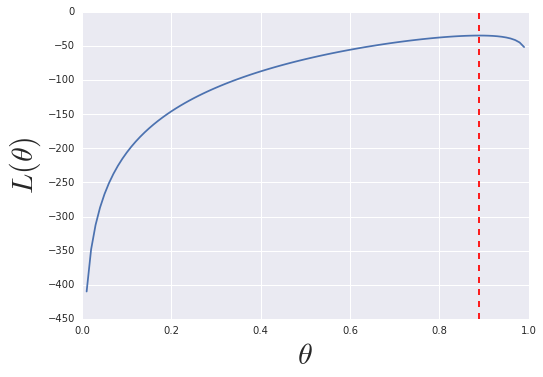

In [7]:
thetas = np.arange(0.01, 1.0, 0.01)
lls = [log_likelihood(data, theta) for theta in thetas] # 内包表記です. 便利なので覚えましょう. 
plt.plot(thetas, lls)

theta_opt = thetas[np.argmax(lls)] # Argmaxで対数確率の最大値を与えるθの値を取得します. 
plt.plot([theta_opt, theta_opt], [-450, 0], c='r', ls='--')
plt.xlabel('$\\theta$', fontsize=30) # 文字列はLatexの数式記号です. 「Latex 数式」で検索してみてください. 
plt.ylabel('$L(\\theta)$', fontsize=30)

## サンプル数による最尤推定量のばらつき
* 対数尤度関数はデータ$D$に依存します. データが確率的にばらつく場合, 対応する対数尤度関数がどの程度ばらつくかを確認します. 
* データを100回生成し, それぞれについて対数尤度関数をプロットします. 
* サンプル数を10, 100, または1000とします. サンプル数が多いほど関数のばらつきが小さいことが分かります. 

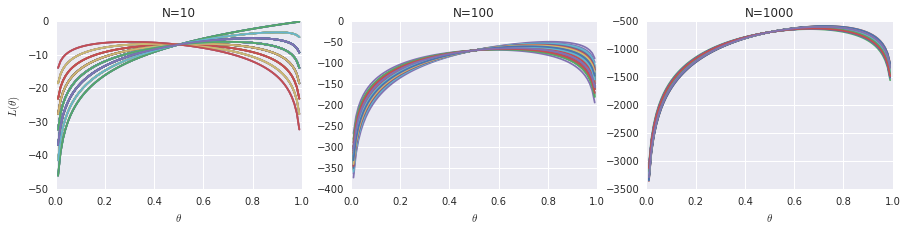

In [8]:
def plot_lls(theta=0.7, n_samples=100): # Pythonは関数の引数にデフォルト値を与えることができます. 
    thetas = np.arange(0.01, 1.0, 0.01)
    rng = np.random.RandomState(0) # ループの外側で乱数生成器を初期化します. 
    
    for i in range(100):
        data = rng.binomial(n=1, p=theta, size=n_samples)
        lls = [log_likelihood(data, theta) for theta in thetas]
        plt.plot(thetas, lls)
        plt.xlabel('$\\theta$')

fig = plt.figure(figsize=(15, 3))
fig.add_subplot(131)
plot_lls(n_samples=10)
plt.title('N=10')
plt.ylabel('$L(\\theta)$')

fig.add_subplot(132)
plot_lls(n_samples=100)
plt.title('N=100')

fig.add_subplot(133)
plot_lls(n_samples=1000)
plt.title('N=1000');

* サンプル数10の場合に顕著ですが, データに関わらず対数尤度関数が常にある1点を通っていることが分かります. 理由を考えてみましょう. 

* 今度は尤度関数ではなく最尤推定量自体のばらつきを確認します. サンプル数が増えると推定量のばらつきが小さくなることが分かります. 

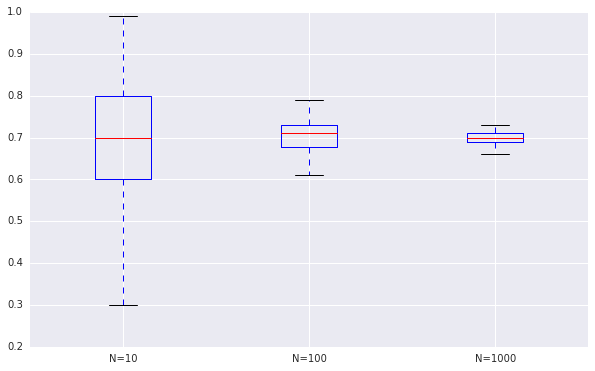

In [9]:
def calc_theta_opts(theta=0.7, n_samples=10):
    thetas = np.arange(0.01, 1.0, 0.01)
    rng = np.random.RandomState(0) # ループの外側で乱数生成器を初期化します. 
    theta_opts = []
    
    for i in range(100):
        data = rng.binomial(n=1, p=theta, size=n_samples)
        lls = [log_likelihood(data, theta) for theta in thetas]
        theta_opts.append(thetas[np.argmax(lls)])
        
    return theta_opts

theta_opts_10 = calc_theta_opts(n_samples=10)
theta_opts_100 = calc_theta_opts(n_samples=100)
theta_opts_1000 = calc_theta_opts(n_samples=1000)

data_to_plot = [theta_opts_10, theta_opts_100, theta_opts_1000]
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_xticklabels(['N=10', 'N=100', 'N=1000']);

## 勾配法による最尤推定

* 全ての$\theta$の値について対数尤度を計算するのは非効率的です. そこで勾配法を用います. 
* 勾配法は次式に基づいてパラメータを逐次的に更新します. 

\begin{eqnarray}
\theta(t+1) &=& \theta(t) + \eta(t)\nabla_{\theta}L(\theta)\mid_{\theta(t)}
\end{eqnarray}

* ここで$\nabla_{\theta}\equiv\partial/\partial\theta$は$\theta$に関する偏微分を表します. 
* $\eta(t)$は学習係数と呼ばれ, パラメータの変化量を制御します. 通常は小さな値を設定します. 
* 学習係数を自動的に調整するアルゴリズムとしてモーメント法, Adagrad, Adam, RMSpropなどがあります. 
* ここでは簡単のために$\eta(t)=0.01$とします. 
* 実際にベルヌーイ分布の対数尤度の偏微分を計算してみます. 対数関数の微分$(\log x)'=1/x$を使います. 

\begin{eqnarray}
\nabla_{\theta}L(\theta) &=& \sum_{n=1}^{N}\left[x\frac{1}{\theta} - (1-x)\frac{1}{1-\theta}\right]
\end{eqnarray}

* この式の意味を明らかにするため, 式を変形してみましょう. $n_{1}=\sum_{n=1}x_{n}$と定義します. これはデータに含まれる1の個数です. 

\begin{eqnarray}
\sum_{n=1}^{N}\left[x\frac{1}{\theta} - (1-x)\frac{1}{1-\theta}\right]
&=& n_{1}\left(\frac{1}{\theta} + \frac{1}{1-\theta}\right) + N\frac{1}{1-\theta} \\
&=& n_{1}\frac{1}{\theta(1-\theta)} + N\frac{\theta}{\theta(1-\theta)}\\
&=& \frac{n_{1}N^{-1}-\theta}{\theta(1-\theta)}
\end{eqnarray}

* 最後の式から何が言えるのか, 考えてみましょう. 
* $\theta\in[0, 1]$という制約を満たすようにアルゴリズムを構成する必要があります（制約付き最適化）. しかしそれは手間なので, $\theta$を別のパラメータ$\lambda$を用いてシグモイド関数で表します. 

\begin{eqnarray}
\theta &=& \frac{1}{1+\exp(-\lambda)}
\end{eqnarray}

* こうすると先ほどの制約が自動的に満たされるので, $L(\theta)$の$\lambda$に関する制約なし最適化を解けばよいこととなります. 
* 実際のコードでは, $\theta=0$または$1$とならないようにシグモイド関数を適当に打ち切る場合があります. 
* 変数の置き換えを行ったので, 対数尤度関数を$L(\lambda)$と表します. 
* 改めて対数尤度関数を$\lambda$で微分します. チェーンルールを使います. 

\begin{eqnarray}
\nabla_{\lambda}L(\lambda) &=& \frac{\partial L}{\partial\theta}\frac{\partial\theta}{\partial\lambda}
\end{eqnarray}

* $\partial\theta/\partial\lambda$の部分は次のようになります. 

\begin{eqnarray}
\frac{\partial\theta}{\partial\lambda} &=& \frac{\exp(-\lambda)}{(1+\exp(-\lambda))^{2}}\\
                                       &=& \theta(1-\theta)
\end{eqnarray}

* したがって, 次式が成り立ちます. 

\begin{eqnarray}
\nabla_{\lambda}L(\lambda) &=& n_{1}N^{-1} - \theta
\end{eqnarray}

* 勾配法を実装する前に, データ中の1の回数を数える方法を確認します. 

In [10]:
xs = np.array([1, 1, 0, 0, 1])
print(xs == 1)
print(xs[xs == 1])
print(xs[xs == 1].sum())

[ True  True False False  True]
[1 1 1]
3


* では, 勾配法を実装しましょう. 

In [11]:
def opt_grad(xs, n_iter, eta, lmd_init):
    lmd = lmd_init # パラメータの初期値を設定します. 
    theta = lambda lmd: 1 / (1 + np.exp(-lmd)) # θ(λ)を定義します. 
    thetas = []
    lls = []
    ratio = xs[xs == 1].sum() / float(len(xs))

    for i in range(n_iter):
        lmd += eta * (ratio - theta(lmd)) # パラメータ更新則です. 
        lls.append(log_likelihood(xs, theta(lmd)))
        thetas.append(theta(lmd))

    return lls, thetas

* 実際に使用してみます. 

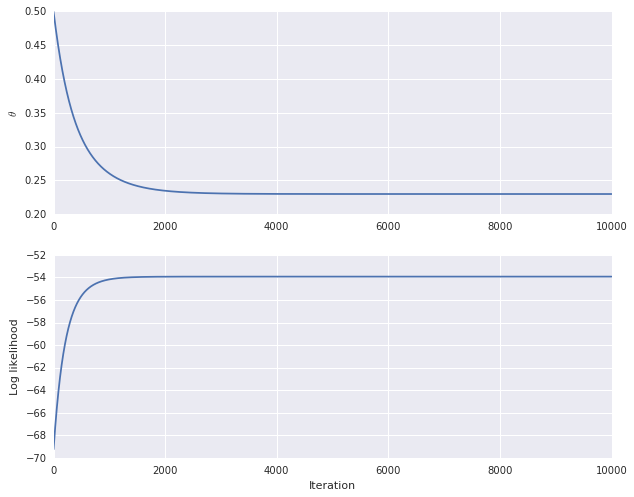

In [22]:
rng = np.random.RandomState(0)
data = rng.binomial(n=1, p=0.3, size=100)
lls, thetas = opt_grad(data, n_iter=10000, eta=1e-2, lmd_init=0) # λ=0の場合θ=0.5となります. 

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(211)
ax1.plot(thetas)
ax1.set_ylabel('$\\theta$')

ax2 = fig.add_subplot(212)
ax2.plot(lls)
ax2.set_ylabel('Log likelihood')
ax2.set_xlabel('Iteration')